EXPLORATORY DATA ANALYSIS

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(aisles.head())
print(departments.head())
print(order_products_prior.head())
print(order_products_train.head())
print(orders.head())
print(products.head())

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

print(aisles.info())
print(departments.info())
print(order_products_prior.info())
print(order_products_train.info())
print(orders.info())
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22441137 entries, 0 to 22441136
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         float64
 2   add_to_cart_order  float64
 3   reordered          float64
dtypes: float64(3), int64(1)
memory usage: 684.8 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
merged_df = order_products_prior.merge(products, on='product_id', how='left')
merged_df = merged_df.merge(aisles, on='aisle_id', how='left')
merged_df = merged_df.merge(departments, on='department_id', how='left')
merged_df = merged_df.merge(orders, on='order_id', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


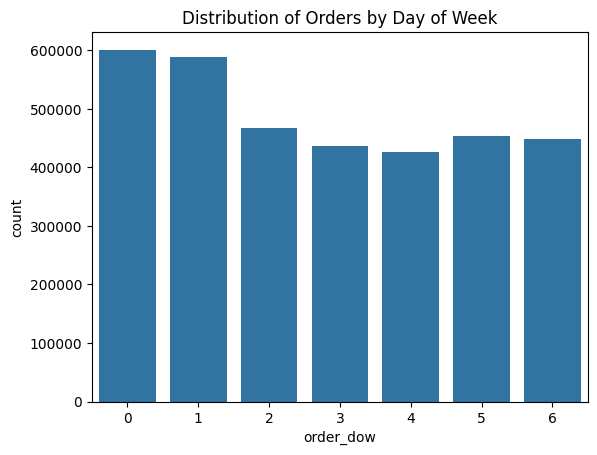

In [ ]:
sns.countplot(x='order_dow', data=orders)
plt.title('Distribution of Orders by Day of Week')
plt.show()

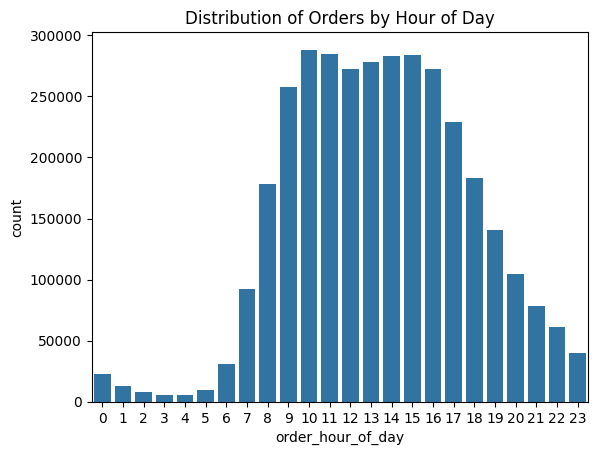

In [ ]:
sns.countplot(x='order_hour_of_day', data=orders)
plt.title('Distribution of Orders by Hour of Day')
plt.show()

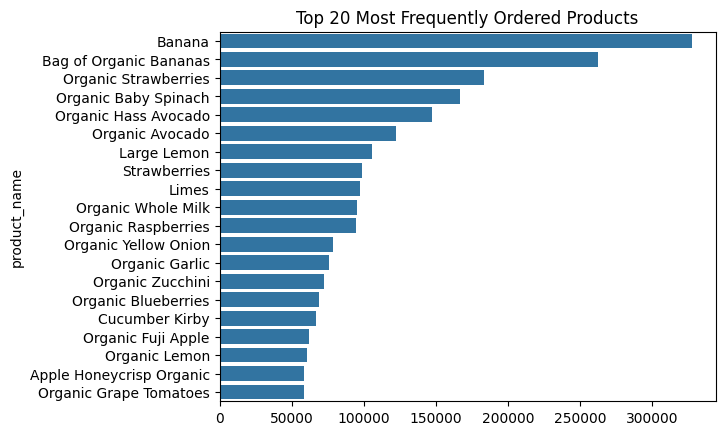

In [ ]:
top_products = merged_df['product_name'].value_counts().head(20)
sns.barplot(y=top_products.index, x=top_products.values, orient='h')
plt.title('Top 20 Most Frequently Ordered Products')
plt.show()

In [ ]:
print(orders[['order_dow', 'order_hour_of_day']].isnull().sum())
orders = orders.dropna(subset=['order_dow', 'order_hour_of_day'])


order_dow            0
order_hour_of_day    0
dtype: int64


In [ ]:
orders_by_dow_hour = orders.groupby(['order_dow', 'order_hour_of_day']).size().reset_index(name='counts')
print(orders_by_dow_hour.head())

   order_dow  order_hour_of_day  counts
0          0                  0    3936
1          0                  1    2398
2          0                  2    1409
3          0                  3     963
4          0                  4     813


In [ ]:
duplicates = orders_by_dow_hour[orders_by_dow_hour.duplicated(['order_dow', 'order_hour_of_day'], keep=False)]
print(duplicates)


Empty DataFrame
Columns: [order_dow, order_hour_of_day, counts]
Index: []


In [ ]:
# Group by 'order_dow' and 'order_hour_of_day', then count the occurrences
orders_by_dow_hour = orders.groupby(['order_dow', 'order_hour_of_day']).size().reset_index(name='counts')

# Display the result of the groupby operation
print(orders_by_dow_hour.head())

   order_dow  order_hour_of_day  counts
0          0                  0    3936
1          0                  1    2398
2          0                  2    1409
3          0                  3     963
4          0                  4     813


In [ ]:
# Group by 'order_dow' and 'order_hour_of_day', then count the occurrences
orders_by_dow_hour = orders.groupby(['order_dow', 'order_hour_of_day']).size().reset_index(name='counts')

# Pivot the data to create a new DataFrame with 'order_dow' as the index, 'order_hour_of_day' as the columns, and 'counts' as the values
orders_by_dow_hour_pivot = orders_by_dow_hour.pivot(index='order_dow', columns='order_hour_of_day', values='counts')

# Display the pivoted DataFrame
print(orders_by_dow_hour_pivot)

order_hour_of_day    0     1     2    3    4     5     6      7      8   \
order_dow                                                                 
0                  3936  2398  1409  963  813  1168  3329  12410  28108   
1                  3674  1830  1105  748  809  1607  5370  16571  34116   
2                  3059  1572   943  719  744  1399  4758  13245  24635   
3                  2952  1495   953  654  719  1355  4562  12396  22553   
4                  2642  1512   899  686  730  1330  4401  12493  21814   
5                  3189  1672  1016  841  910  1574  4866  13434  24015   
6                  3306  1919  1214  863  802  1136  3243  11319  22960   

order_hour_of_day     9   ...     14     15     16     17     18     19  \
order_dow                 ...                                             
0                  40798  ...  54552  53954  49463  39753  29572  22654   
1                  51908  ...  46764  46403  44761  36792  28977  22145   
2                  36314

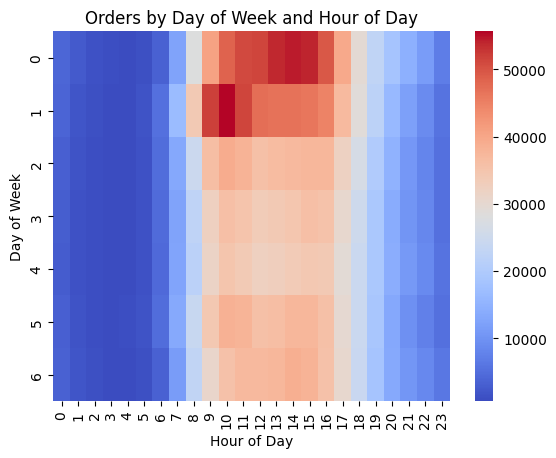

In [ ]:
# Plot the heatmap
sns.heatmap(orders_by_dow_hour_pivot, cmap='coolwarm')
plt.title('Orders by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


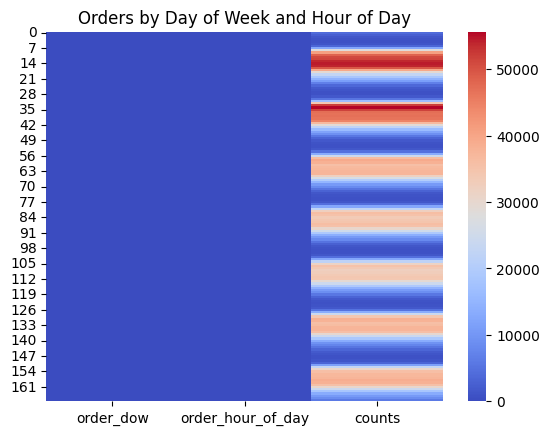

In [ ]:
sns.heatmap(orders_by_dow_hour, cmap='coolwarm')
plt.title('Orders by Day of Week and Hour of Day')
plt.show()

MARKET BASKET ANALYSIS

In [ ]:
basket = merged_df.groupby(['order_id', 'product_name'])['add_to_cart_order'].count().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

In [ ]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)


In [ ]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.sort_values('lift', ascending=False, inplace=True)
print(rules.head())

In [ ]:
sns.scatterplot(x='support', y='confidence', size='lift', data=rules.head(10), legend=False)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Top 10 Association Rules')
plt.show()